## Simular el rendimiento de un activo con Movimiento Browniano

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

np.random.seed(123)

In [2]:
stocks = ['MSFT']
start_date = '2020-01-01'
end_date = '2025-01-01'

## Datos como función

In [3]:
# Como función
def get_data(stocks, start_date, end_date):
    prices = yf.download(stocks, start_date, end_date, progress=False)['Adj Close']
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    std_returns = returns.std()
    return mean_returns, std_returns, prices.iloc[-1]

mean_returns, std_returns, last_price = get_data(stocks, start_date, end_date)

## Simular rendimientos como función

In [4]:
def simular_precios(mean_returns, std_returns, last_price, num_dias):
    Z = np.random.normal(0,1,num_dias)
    simulated_returns = mean_returns + std_returns * Z
    cumulative_simulated_returns = (1 + simulated_returns).cumprod()
    simulated_prices = last_price * cumulative_simulated_returns
    return simulated_prices

In [5]:
num_dias = 100

simulated_prices = simular_precios(mean_returns, std_returns, last_price, num_dias)

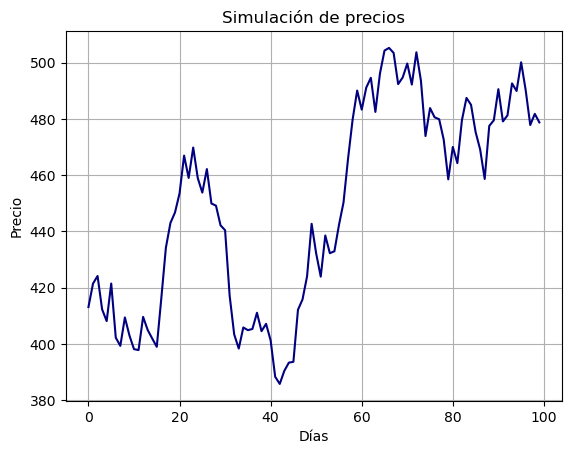

In [6]:
sim_df = pd.DataFrame(simulated_prices)
plt.plot(sim_df, c = 'navy')
plt.title('Simulación de precios')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.grid()

## En un Montecarlo

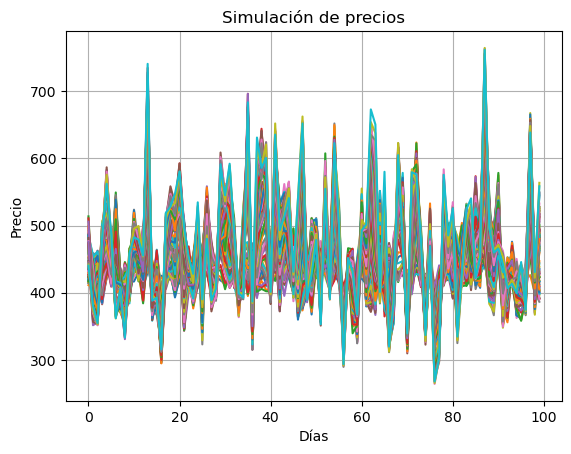

In [7]:
trayectorias = []
mean_returns, std_returns, last_price = get_data(stocks, start_date, end_date)
for i in range(100):
    trayectorias.append(simular_precios(mean_returns, std_returns, last_price, num_dias))
 

plt.plot(trayectorias)
plt.title('Simulación de precios')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.grid()